## Probability

### Odds to Probability

$P(X) = \frac{O(X)}{1+O(X)}$

### Probability to Odds

$O(X) = \frac{P(X)}{1 - P(X)}$

## Probability Math

### Joint Probabilities

$P(\text{A AND B}) = P(A) * P(B)$

Example: there are two sides on a coin and six sides on the die, so the probability of heads is 1/2 and the probability of six is 1/6.

$P(\text{heads AND 6}) = \frac{1}{2} * \frac{1}{6} = \frac{1}{12} = 0.08\overline{333}$

#### Why?

H1  H2  H3  H4  H5  **H6**  T1  T2  T3  T4  T5  T6

### Union Probabilities

#### Mutually exclusive events

$P(\text{A OR B}) = P(A) + P(B)$

$P(\text{4 OR 6}) = \frac{1}{6} + \frac{1}{6} = \frac{1}{3}$

#### Nonmutually exclusive events

$P(\text{heads OR 6}) = \frac{7}{12} = 0.58\overline{333}$

##### Why?

**H1  H2  H3  H4  H5  H6**  T1  T2  T3  T4  T5  **T6**

**NOTE**: adding both probabilites would be wrong as we would be double counting the probability of getting a 6 (H6 and T6).

**Wrong**: $P(\text{heads OR 6}) = \frac{1}{2} + \frac{1}{6} = \frac{4}{6} = 0.\overline{666}$

The logical way to remove double-counting in a union probability is to subtract the joint probability. This is known as the sum rule of probability and ensures every joint event is counted only once:

$P(\text{A OR B}) = P(A) + P(B) - P(\text{A AND B})$

$P(\text{A OR B}) = P(A) + P(B) - P(A) * P(B)$

$P(\text{heads OR 6}) = \frac{1}{2} + \frac{1}{6} - (\frac{1}{2} * \frac{1}{6}) = 0.58\overline{333}$

### Conditional Probability and Bayes’ Theorem

$P(\text{A GIVEN B})$ or $P(A|B)$

Example:

$P(\text{Coffee GIVEN Cancer})$ or $P(\text{Coffee|Cancer})$: This represents a probability of people who drink coffee given they have cancer.

$P(\text{Coffee}) = 0.65$

$P(\text{Cancer}) = 0.005$

$P(\text{Coffee|Cancer}) = 0.85$

The direction of the condition matters. The “probability of having cancer given you are a coffee drinker” is different from the “probability of being a coffee drinker given you have cancer.”

How do we flip the condition?

#### Bayes’ Theorem

$P(\text{A|B}) = \frac{P(\text{B|A}) * P(A)}{P(B)}$

$P(\text{Cancer|Coffee}) = \frac{P(\text{Coffee|Cancer}) * P(Coffee)}{P(Cancer)}$

$P(\text{Cancer|Coffee}) = \frac{0.85 * 0.005}{0.65} = 0.0065$

In [3]:
# Using Bayes’ Theorem in Python

p_coffee_drinker = .65
p_cancer = .005
p_coffee_drinker_given_cancer = .85

p_cancer_given_coffee_drinker = p_coffee_drinker_given_cancer * p_cancer / p_coffee_drinker

p_cancer_given_coffee_drinker

0.006538461538461539

### Joint and Union Conditional Probabilities



The probability somebody is a coffee drinker AND they have cancer:

$P(\text{Cancer|Coffee}) * P(\text{Cancer}) = 0.85 * 0.005 = 0.00425$

This means the probability of someone having cancer and being a coffee drinker is 0.425%:

$P(\text{Cancer AND Coffee}) = P(\text{Cancer|Coffee}) * P(\text{Cancer}) = 0.85 * 0.005 = 0.00425$

> If we did not have any conditional probabilities available, then the best we can do is multiply $P(\text{Coffee Drinker})$ and as shown here: $P(\text{Coffee}) * P(\text{Cancer}) = 0.65 * 0.005 = 0.00325$

If event A has no impact on event B, then what does that mean for conditional probability P(B|A)? That means P(B|A) = P(B), therefore:

$P(\text{A AND B}) = P(\text{B}) * P(\text{A|B})$

To calculate the probability of A or B occurring, but A may affect the probability of B, we update our sum rule like this:

$P(\text{A OR B}) = P(\text{A}) + P(\text{B}) - P(\text{A|B}) * P(\text{B})$

## Binomial Distribution



In [3]:
from scipy.stats import binom

n = 10
p = 0.9
binoms = []

for k in range(n + 1):
    probability = binom.pmf(k, n, p)
    binoms.append(probability)
    print("{0} - {1}".format(k, probability))


0 - 9.999999999999978e-11
1 - 8.999999999999978e-09
2 - 3.6449999999999943e-07
3 - 8.747999999999991e-06
4 - 0.00013778099999999974
5 - 0.0014880347999999982
6 - 0.011160260999999996
7 - 0.05739562799999997
8 - 0.1937102444999998
9 - 0.38742048899999976
10 - 0.3486784401000001


<BarContainer object of 11 artists>

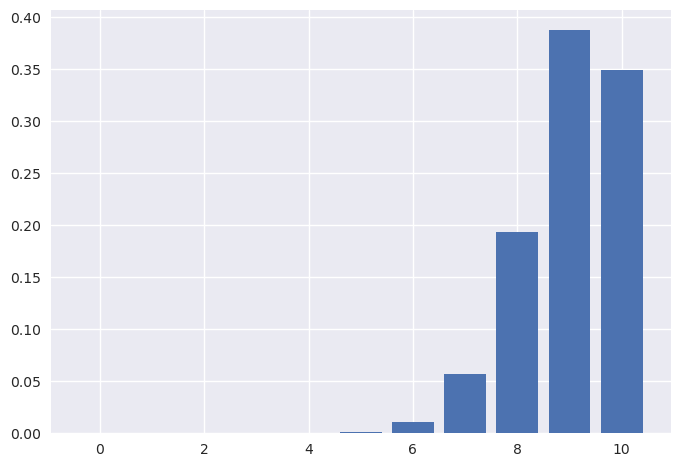

In [8]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

plt.bar(range(0, 11), binoms)

## Beta Distribution

In [17]:
# Beta distribution using SciPy

from scipy.stats import beta

successes = 8
failures = 2

left_area = beta.cdf(.90, successes, failures)
left_area

0.7748409780000002

In [18]:
# Subtracting to get a right area in a beta distribution

right_area = 1 - left_area
right_area

0.22515902199999982

In [20]:
# A beta distribution with more trials

from scipy.stats import beta

successes = 30
failures = 6

1.0 - beta.cdf(.90, successes, failures)

0.13163577484183697

In [21]:
# Beta distribution middle area using SciPy

from scipy.stats import beta

successes = 8
failures = 2

beta.cdf(.90, successes, failures) - beta.cdf(.80, successes, failures)

0.33863336199999994

## Exercises





1. There is a 30% chance of rain today, and a 40% chance your umbrella order will arrive on time. You are eager to walk in the rain today and cannot do so without either!

**What is the probability it will rain AND your umbrella will arrive?**

> $0.3 * 0.4 = 0.12$

2. There is a 30% chance of rain today, and a 40% chance your umbrella order will arrive on time. You will be able to run errands only if it does not rain or your umbrella arrives.

**What is the probability it will not rain OR your umbrella arrives?**

> $(1 - 0.3) + 0.4 - (0.3 * 0.4) = 0.98$

3. There is a 30% chance of rain today, and a 40% chance your umbrella order will arrive on time. However, you found out if it rains there is only a 20% chance your umbrella will arrive on time.

**What is the probability it will rain AND your umbrella will arrive on time?**

>$P(\text{Umbrella AND Rain}) = P(\text{Rain}) * P(\text{Umbrella|Rain})$<br>
>$P(\text{Umbrella AND Rain}) = 0.3 * 0.2 = 0.06$



4. You have 137 passengers booked on a flight from Las Vegas to Dallas. However, it is Las Vegas on a Sunday morning and you estimate each passenger is 40% likely to not show up. You are trying to figure out how many seats to overbook so the plane does not fly empty.

**How likely is it at least 50 passengers will not show up?**

In [24]:
# WRONG

from scipy.stats import binom

n = 137
p = 0.4
k = 50

binom.pmf(k, n, p)

0.04958507128101913

In [26]:
# Correct

from scipy.stats import binom

n = 137
p = .40

p_50_or_more_noshows = 0.0

for x in range(50,138):
    p_50_or_more_noshows += binom.pmf(x, n, p)

p_50_or_more_noshows

0.8220955881474253

5. You flipped a coin 19 times and got heads 15 times and tails 4 times.

**Do you think this coin has any good probability of being fair? Why or why not?**


In [32]:
from scipy.stats import beta

successes = 15
failures = 4

1 - beta.cdf(.50, successes, failures)

0.9962310791015625

> No, the chance of the coin being between 50% and 100% is 99.6%.